# **Bab 11: Neural Nets**

**Pradytha Galuh P, Virgiawan Malik R, Nur Aini Rahayu P.L, Ziyad Athoillah, Ibnu Raihan**

Bab ini membahas jaringan saraf sebagai metode berbasis data yang fleksibel untuk klasifikasi, prediksi, dan ekstraksi fitur, serta sebagai dasar pembelajaran mendalam. Dijelaskan konsep node dan lapisan (input, tersembunyi, output), cara kerja jaringan, serta proses pelatihan menggunakan data. Mengingat risiko overfitting, disajikan strategi pencegahannya. Juga dibahas parameter-parameter penting yang memengaruhi proses pelatihan. Akhirnya, pembahasan diperluas ke jaringan saraf yang lebih dalam dalam konteks pembelajaran mendalam.


# **Python**

**Import Library required functionality for this chapter**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary

Colab environment detected.


In [ ]:
%pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 100.4 MB/s eta 0:00:00


# **Pendahuluan (11.1 Introduction)**

Neural networks atau jaringan saraf tiruan merupakan salah satu metode pembelajaran mesin yang sangat fleksibel dan dapat digunakan untuk berbagai tujuan, seperti klasifikasi, prediksi, hingga ekstraksi fitur. Teknik ini terinspirasi dari cara kerja otak manusia, di mana neuron-neuron saling terhubung dan belajar dari pengalaman. Dalam praktiknya, neural networks menjadi fondasi dari deep learning, sebuah pendekatan yang digunakan secara luas dalam aplikasi kecerdasan buatan seperti pengenalan wajah, suara, serta kendaraan otonom.

Keunggulan utama dari neural networks terletak pada kemampuannya untuk mempelajari hubungan yang sangat kompleks antara variabel prediktor dan target. Hal ini memungkinkan jaringan untuk melakukan prediksi dengan tingkat akurasi yang sangat tinggi, bahkan dalam kasus di mana hubungan antar variabel tidak dapat dimodelkan secara langsung menggunakan pendekatan statistik tradisional. Sejumlah studi telah menunjukkan keberhasilan neural networks dalam berbagai bidang, mulai dari keuangan (misalnya untuk prediksi kebangkrutan atau deteksi kecurangan kartu kredit), manajemen hubungan pelanggan (CRM), hingga sistem kendaraan tanpa pengemudi seperti proyek ALVINN.



# **Struktur Jaringan Neural (11.2 Concept and Structure of a Neural Network)**

Jaringan saraf tiruan terdiri dari tiga jenis lapisan utama, yaitu input layer, hidden layer, dan output layer. Input layer bertugas menerima nilai-nilai dari variabel prediktor, sementara hidden layer berfungsi sebagai pengolah informasi utama yang menerapkan bobot dan fungsi aktivasi. Output layer menghasilkan nilai akhir sebagai prediksi dari model.

Proses dalam setiap node cukup khas: node menerima input dari node pada lapisan sebelumnya, mengalikan masing-masing input dengan bobot tertentu, lalu menjumlahkan semuanya dan menambahkan nilai bias. Hasil dari proses ini kemudian diproses oleh suatu fungsi aktivasi untuk menghasilkan output. Fungsi aktivasi ini dapat berupa fungsi sigmoid (logistic), ReLU (rectified linear unit), atau fungsi lainnya, tergantung pada tujuan dan desain model. Dengan pendekatan ini, neural networks mampu membentuk fungsi yang sangat fleksibel tanpa perlu pengguna secara eksplisit menentukan bentuk matematis hubungan antar variabel seperti pada regresi linier.

# **Melatih Jaringan terhadap Data (11.3 Fitting a Network to Data)**

Proses pelatihan neural network dimulai dengan inisialisasi bobot dan bias secara acak, yang mencerminkan kondisi awal jaringan sebelum belajar. Selanjutnya, data masukan diberikan ke jaringan, dan keluaran dihitung berdasarkan bobot-bobot awal tersebut. Keluaran ini dibandingkan dengan nilai aktual dari data latih, dan selisihnya digunakan untuk memperbarui bobot-bobot jaringan. Proses ini dikenal sebagai backpropagation.

Untuk menjelaskan cara kerja ini, buku memberikan contoh sederhana berupa prediksi terhadap preferensi konsumen terhadap keju. Dataset terdiri dari dua variabel prediktor yaitu tingkat lemak (fat) dan kadar garam (salt), dengan target berupa apakah konsumen menyukai (like) atau tidak menyukai (dislike) sampel keju. Meskipun dataset ini sangat kecil dan tidak cukup realistis untuk penggunaan aktual, contoh ini sangat bermanfaat untuk menjelaskan struktur dan alur perhitungan dalam jaringan.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Data preferensi keju
data = {
    'Fat': [0.2, 0.1, 0.2, 0.2, 0.4, 0.3],
    'Salt': [0.9, 0.1, 0.4, 0.5, 0.5, 0.8],
    'Acceptance': ['like', 'dislike', 'dislike', 'dislike', 'like', 'like']
}
df = pd.DataFrame(data)

# Ubah label jadi angka
df['Acceptance'] = df['Acceptance'].map({'dislike': 0, 'like': 1})

# Pisahkan fitur dan target
X = df[['Fat', 'Salt']]
y = df['Acceptance']

# Bagi menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Bangun model jaringan saraf
model = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic', max_iter=1000, random_state=1)
model.fit(X_train, y_train)

# Evaluasi hasil
y_pred = model.predict(X_test)
print("Hasil Evaluasi Model:\n")
print(classification_report(y_test, y_pred))


Hasil Evaluasi Model:

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dalam jaringan saraf tiruan, setiap node berfungsi untuk menerima input dan menghasilkan output berdasarkan bobot yang diterapkan terhadap input tersebut, ditambah dengan bias, dan kemudian melalui suatu fungsi aktivasi.

Untuk lapisan input (input layer), output dari setiap node sama dengan nilai inputnya. Jika terdapat 𝑝 variabel prediktor, maka akan ada 𝑝 node pada input layer. Sebagai contoh, bila terdapat dua variabel yaitu Fat dan Salt, maka input layer akan memiliki dua node dengan nilai masing-masing $x_1 = 0.2$ dan $x_2 = 0.9$ dan nilai output dari lapisan ini adalah sama.

Pada lapisan tersembunyi (hidden layer), setiap node menerima input dari semua node pada lapisan sebelumnya. Untuk menghitung output sebuah node pada hidden layer, dilakukan proses sebagai berikut:

1. Hitung jumlah tertimbang dari semua input, ditambah dengan bias.

2. Terapkan fungsi aktivasi pada hasil tersebut.

Secara matematis, untuk input $x_1, x_2, \dots, x_p$ output dari node ke-
𝑗 dihitung dengan rumus:

$$
\text{Output}_j = g\left( \theta_j + \sum_{i=1}^{p} w_{ij} x_i \right)
$$

Fungsi sigmoid dulunya sangat populer karena kemampuannya menekan nilai ekstrem dan bersifat hampir linear antara 0.1 dan 0.9. Pada jaringan saraf dalam (deep neural networks), fungsi ReLU (Rectified Linear Unit) kini lebih sering digunakan karena efisiensinya. Fungsi ReLU didefinisikan sebagai nilai linear untuk $s > 0$, dan nol untuk $s \leq 0$.

Sebagai contoh, jika menggunakan fungsi sigmoid, maka output dari node 𝑗 pada hidden layer dituliskan sebagai:
$$
\text{Output}_j = \frac{1}{1 + e^{-(\theta_j + \sum_{i=1}^{p} w_{ij} x_i)}}
$$



# **Inisialisasi Bobot dan Bias ( Initializing the Weights and Bias)**

Pelatihan jaringan saraf dimulai dengan inisialisasi bobot ($w_{ij}$) dan bias ($\theta_j$) menggunakan nilai kecil yang acak dan mendekati nol. Nilai-nilai awal ini mencerminkan kondisi awal jaringan yang belum memiliki pengetahuan apa pun, layaknya model tanpa prediktor. Sebagai contoh, pada node N3, digunakan nilai awal $\theta_3 = -0.3$, $w_{1,3} = 0.05$, dan $w_{2,3} = 0.01$. Nilai-nilai ini digunakan untuk menghitung output awal dari node menggunakan fungsi aktivasi logistik.

## Perhitungan Output dan Arsitektur Jaringan

Output dari node N3 dihitung dengan fungsi logistik menggunakan input dan bobot yang telah diinisialisasi sebelumnya:

$$
\text{Output}_{N3} = \frac{1}{1 + e^{-(-0.3 + 0.05 \cdot 0.2 + 0.01 \cdot 0.9)}} = 0.43
$$

Arsitektur jaringan terdiri dari dua input (Fat dan Salt), tiga node di hidden layer (N3, N4, N5), dan satu node output (N6). Output dari N6 dihitung dengan menjumlahkan hasil perkalian output dari hidden layer dan bobot menuju node output:

$$
\text{Output}_{N6} = \frac{1}{1 + e^{-(-0.015 + 0.01 \cdot 0.43 + 0.05 \cdot 0.51 + 0.015 \cdot 0.52)}} = 0.506
$$

Nilai ini disebut *propensity* atau probabilitas bahwa output termasuk ke dalam kelas *like*. Jika nilainya melebihi ambang batas 0.5, maka data tersebut diklasifikasikan sebagai *like*.

# **Hubungan dengan Regresi ( Relation to Linear and Logistic Regression)**

Jaringan saraf tanpa hidden layer dapat dianalogikan dengan regresi linear atau regresi logistik, tergantung pada fungsi aktivasi yang digunakan. Jika fungsi aktivasi adalah identitas, maka jaringan tersebut setara dengan regresi linear biasa:

$$
\hat{Y} = \theta + \sum_{i=1}^{p} w_i x_i
$$

Namun, jika fungsi aktivasi adalah fungsi logistik, maka bentuknya setara dengan regresi logistik:

$$
\hat{P}(Y = 1) = \frac{1}{1 + e^{-(\theta + \sum_{i=1}^{p} w_i x_i)}}
$$

Meskipun bentuk matematisnya serupa, metode estimasi parameter pada neural network berbeda karena tidak menggunakan pendekatan least squares atau maximum likelihood, melainkan estimasi berdasarkan kesalahan prediksi (*error-based learning*) melalui proses iteratif.

# **Pra-pemrosesan Data (Preprocessing the Data)**

Agar jaringan saraf bekerja optimal, terutama saat menggunakan fungsi aktivasi logistik, data perlu dinormalisasi ke skala $[0, 1]$. Proses normalisasi dilakukan dengan rumus:

$$
X_{\text{norm}} = \frac{X - a}{b - a}
$$

Untuk variabel biner, cukup direpresentasikan dengan 0 dan 1. Untuk variabel kategorik ordinal, dapat digunakan skala fraksional. Sedangkan untuk kategorik nominal, perlu dikonversi menjadi dummy variable. Transformasi logaritmik disarankan bagi variabel dengan distribusi sangat miring (skewed), seperti penghasilan. Jika menggunakan fungsi aktivasi *tanh*, skala yang lebih tepat untuk input adalah $[-1, 1]$.

# **Pelatihan Model dan Backpropagation (Training the Model and Back Propagation of Error)**

Pelatihan model bertujuan untuk meminimalkan kesalahan prediksi dengan memperbarui bobot dan bias. Setiap data diproses dengan menghitung output, membandingkannya dengan nilai aktual, dan menghitung selisihnya (error). Proses *backpropagation* digunakan untuk menyebarkan error dari output layer ke hidden layer.

Error pada node output $k$ dihitung dengan rumus:

$$
\text{err}_k = \hat{y}_k (1 - \hat{y}_k)(y_k - \hat{y}_k)
$$

Pembaruan parameter dilakukan dengan rumus:

$$
\theta_j^{\text{new}} = \theta_j^{\text{old}} + \lambda \cdot \text{err}_j
$$

$$
w_{ij}^{\text{new}} = w_{ij}^{\text{old}} + \lambda \cdot x_i \cdot \text{err}_j
$$

di mana $\lambda$ adalah learning rate.

## Contoh Pembaruan dan Hasil Akhir

Sebagai contoh, jika error pada node output N6 sebesar 0.123 dan learning rate yang digunakan adalah 0.5, maka parameter diperbarui sebagai berikut:

$$
\theta_6 = -0.015 + 0.5 \cdot 0.123 = 0.047
$$

$$
w_{3,6} = 0.01 + 0.5 \cdot 0.123 = 0.072
$$

dan seterusnya untuk bobot lain.

Metode *case updating* memperbarui parameter setelah setiap data diproses. Sebaliknya, *batch updating* memperbarui parameter setelah semua data selesai diproses dalam satu epoch. Pelatihan dihentikan jika bobot dan bias tidak berubah signifikan, error klasifikasi memadai, atau jumlah iterasi maksimum tercapai.

Gambar akhir menunjukkan hasil dari pelatihan menggunakan `MLPClassifier` dari scikit-learn, dengan bobot dan bias yang telah diperbarui secara signifikan dari nilai awal.


**Tabel 11.2** Jaringan Syaraf Dengan Satu Lapisan Tersembunyi (Tiga Node) Untuk Contoh Data Kecil

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier

# Data sesuai yang diberikan
data = {
    "Obs": [1, 2, 3, 4, 5, 6],
    "Fat score": [0.2, 0.1, 0.2, 0.2, 0.4, 0.3],
    "Salt score": [0.9, 0.1, 0.4, 0.5, 0.5, 0.8],
    "Acceptance": ["like", "dislike", "dislike", "dislike", "like", "like"]
}

# Buat DataFrame
df = pd.DataFrame(data)

# Tentukan prediktor dan target
predictors = ['Fat score', 'Salt score']
outcome = 'Acceptance'
X = df[predictors]
y = df[outcome]
classes = sorted(y.unique())

# Model Jaringan Syaraf Tiruan
clf = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(X, y)

# Cetak struktur jaringan
print("Intercepts")
print(clf.intercepts_)
print("Weights")
print(clf.coefs_)

# Prediksi probabilitas
proba = clf.predict_proba(X)

# Gabungkan hasil prediksi ke DataFrame
result = pd.concat([df, pd.DataFrame(proba, columns=clf.classes_)], axis=1)
print(result)

Intercepts
[array([0.13368042, 4.07247548, 7.00768105]), array([14.3074867])]
Weights
[array([[ -1.3065648 ,  -4.20427797, -13.29587331],
       [ -0.0439973 ,  -4.91606921,  -6.03356987]]), array([[ -0.27348314],
       [ -9.01211576],
       [-17.63504684]])]
   Obs  Fat score  Salt score Acceptance   dislike      like
0    1        0.2         0.9       like  0.000490  0.999510
1    2        0.1         0.1    dislike  0.999994  0.000006
2    3        0.2         0.4    dislike  0.999741  0.000259
3    4        0.2         0.5    dislike  0.997368  0.002632
4    5        0.4         0.5       like  0.002133  0.997867
5    6        0.3         0.8       like  0.000075  0.999925


Bagian awal output menunjukkan parameter estimasi yang menghubungkan lapisan input ke lapisan tersembunyi, lalu ke lapisan output. Intercept merupakan bias tiap node (𝜃₃ hingga 𝜃₆), sedangkan weights digunakan untuk menghitung output node tersembunyi. Nilai-nilai ini diperoleh secara iteratif dari inisialisasi acak (**Gambar 11.3**). Sebagai contoh, output node N3 untuk observasi pertama dihitung sebagai berikut:
$$
\text{Output}_{N3} = \frac{1}{1 + e^{-(0.134 + (-1.306)(0.2) + (-0.044)(0.9))}} = 0.458
$$
Output dari dua node tersembunyi lainnya untuk observasi pertama adalah OutputN4=0,233 dan OutputN5=0,253. Selanjutnya, bobot dan bias yang baru digunakan untuk menghitung probabilitas output *like* (node N6) berdasarkan ketiga output dari node tersembunyi tersebut, dengan rumus sebagai berikut:
$$
\text{Output}_{N6} = \frac{1}{1 + e^{-[14.307 + (-0.273)(0.458) + (-9.012)(0.233) + (-17.635)(0.253)]}} = 1.00
$$
(Lebih akuratnya, dengan menggunakan semua desimal yang ditunjukkan pada **Tabel 11.2** akan mengarah ke Output N6=0.9995).
Probabilitas untuk lima observasi lainnya dihitung dengan cara serupa, lalu diklasifikasikan menggunakan ambang batas 0,5. Hasilnya, seluruh observasi berhasil diklasifikasikan dengan benar, seperti ditunjukkan dalam **Tabel 11.2** dan matriks konfusi pada **Tabel 11.3**.

**Tabel 11.3** Matriks Konfusi Untuk Contoh Kecil

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Data input
data = {
    "Obs": [1, 2, 3, 4, 5, 6],
    "Fat score": [0.2, 0.1, 0.2, 0.2, 0.4, 0.3],
    "Salt score": [0.9, 0.1, 0.4, 0.5, 0.5, 0.8],
    "Acceptance": ["like", "dislike", "dislike", "dislike", "like", "like"]
}

# DataFrame
df = pd.DataFrame(data)

# Definisi prediktor dan target
X = df[['Fat score', 'Salt score']]
y = df['Acceptance']
classes = sorted(y.unique())

# Model MLP
clf = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(X, y)

# Prediksi
y_pred = clf.predict(X)

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred, labels=classes)
accuracy = accuracy_score(y, y_pred)

# Tampilkan hasil seperti di gambar
print("Confusion Matrix (Accuracy {:.4f})".format(accuracy))
print("\nPrediction")
print("         dislike like")
for i, label in enumerate(classes):
    row = ' '.join(f"{val:7d}" for val in conf_matrix[i])
    print(f"Actual {label:<8s} {row}")


Confusion Matrix (Accuracy 1.0000)

Prediction
         dislike like
Actual dislike        3       0
Actual like           0       3


**Contoh 2 : Klasifikasi Tingkat Keparahan Kecelakaan**

Contoh ini menunjukkan penerapan pelatihan jaringan pada data kecelakaan mobil di AS untuk mengklasifikasikan tingkat keparahan (tidak ada cedera, cedera, atau fatal). Tujuannya adalah membantu sistem penanganan darurat menentukan prioritas berdasarkan laporan awal.

Penelitian ini menjelaskan empat variabel prediktor dan satu variabel outcome untuk data kecelakaan mobil. Variabel ALCHL_I dikonversi menjadi dummy 0/1 (ada atau tidak ada alkohol), sedangkan SUR_COND dipecah menjadi empat dummy (kering, basah, salju/lumpur, es). Total terdapat tujuh variabel prediktor, termasuk PROFIL_I_R (profil jalan), VEH_INVL (jumlah kendaraan), dan MAX_SEV_IR (keparahan cedera).

Analisis ini bertujuan memprediksi tingkat keparahan kecelakaan dari laporan awal guna membantu alokasi sumber daya bagi petugas pertama. Model jaringan saraf digunakan dengan 7 node input, 3 neuron output, dan 1 lapisan tersembunyi dengan 2 node, yang memberikan keseimbangan ideal antara akurasi pelatihan dan validasi. Hasil menunjukkan klasifikasi kelas 0 dan 1 baik, tetapi kelas 2 masih sulit diklasifikasi dengan akurat.


**Tabel 11.6** Jaringan Syaraf Dengan Dua Node di Lapisan Tersembunyi(Data Kecelakaan)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Data input dari gambar
data = {
    "ALCHL_I": [1, 2, 2, 1, 2, 2, 2, 2, 2, 2],
    "PROFIL_I_R": [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    "SUR_COND": [1]*10,
    "VEH_INVL": [1, 1, 1, 1, 1, 1, 3, 4, 2, 2],
    "MAX_SEV_IR": [1, 0, 1, 0, 2, 1, 1, 1, 0, 0]
}
df = pd.DataFrame(data)

# Definisikan prediktor dan target
X = df.drop(columns=['MAX_SEV_IR'])
y = df['MAX_SEV_IR']

# Bagi data menjadi training dan validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Skala fitur agar lebih stabil
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
valid_X_scaled = scaler.transform(valid_X)

# Definisikan dan latih model
clf = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=1000, random_state=1)
clf.fit(train_X_scaled, train_y)

# Fungsi untuk menampilkan confusion matrix dan akurasi
def classificationSummary(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    print(f"Confusion Matrix (Accuracy {acc:.4f})")
    print("\nPrediction")
    print("         0    1    2")
    for i, row in enumerate(cm):
        row_str = ' '.join(f"{val:4d}" for val in row)
        print(f"Actual {i:<2} {row_str}")

# Evaluasi model
print("Training set")
classificationSummary(train_y, clf.predict(train_X_scaled))

print("\nValidation set")
classificationSummary(valid_y, clf.predict(valid_X_scaled))

Training set
Confusion Matrix (Accuracy 0.5000)

Prediction
         0    1    2
Actual 0     2    1
Actual 1     2    1

Validation set
Confusion Matrix (Accuracy 0.2500)

Prediction
         0    1    2
Actual 0     0    1    0
Actual 1     1    1    0
Actual 2     1    0    0


Hasil yang kami peroleh dapat bergantung pada cara kami mengatur parameter yang berbeda, dan ada beberapa perangkap yang harus dihindari.

# **Menghindari Overfitting (Avoiding Overfitting)**

Salah satu kelemahan dari jaringan saraf adalah mudah mengalami *overfitting* terhadap data, yang menyebabkan tingkat kesalahan pada data validasi (dan yang paling penting, pada data baru) menjadi terlalu besar. Oleh karena itu, penting untuk membatasi jumlah iterasi pelatihan dan tidak terlalu banyak melatih model (misalnya, pada metode `MLPClassifier()` di Python, kamu bisa mengatur jumlah iterasi menggunakan argumen `max_iter`). Seperti pada pohon klasifikasi dan regresi, overfitting bisa dideteksi dengan memantau kinerja pada data validasi atau, lebih baik lagi, menggunakan *cross-validation*, dan melihat kapan performa mulai menurun meskipun performa pada data pelatihan masih meningkat. Titik minimum dari kesalahan validasi biasanya menjadi indikator yang baik untuk jumlah iterasi optimal, dan bobot (*weights*) pada tahap tersebut kemungkinan besar memberikan hasil terbaik pada data baru.


# **Penggunaan Output untuk Prediksi dan Klasifikasi (Using the Output for Prediction and Classification)**

* Jika jaringan saraf digunakan untuk memprediksi variabel hasil numerik, maka `MLPRegressor()` memakai fungsi aktivasi identitas (alias tanpa aktivasi). Variabel prediktor dan hasil sebaiknya diskalakan ke rentang \[0, 1] sebelum pelatihan. Output juga akan berada dalam skala \[0, 1], dan untuk mengembalikannya ke skala asli \[a, b], kalikan hasil prediksi dengan (b − a) lalu tambahkan a.
* Untuk hasil biner (misalnya `m = 2`), `MLPClassifier()` menggunakan satu node output untuk menghasilkan nilai P(Y = 1). Metode `predict_proba()` akan memberikan probabilitas untuk kedua kelas. Meskipun ambang batas 0.5 lazim digunakan, dalam jaringan saraf nilai sering mengelompok di sekitar 0.5. Sebaiknya gunakan data validasi untuk menentukan ambang prediksi yang optimal.
* Untuk klasifikasi dengan jumlah kelas lebih dari dua (m > 2), umumnya digunakan m node output—satu untuk tiap kelas. Kelas dengan nilai tertinggi dari node output biasanya dipilih sebagai hasil klasifikasi.
* `MLPClassifier` juga bisa digunakan untuk klasifikasi multi-kelas yang *tidak saling eksklusif* (misalnya variabel “Ras” yang memungkinkan seseorang termasuk dalam lebih dari satu kategori).






# **Input yang Dibutuhkan Pengguna (11.4 Required User Input)**

Salah satu bagian yang kompleks dan memakan waktu dalam pelatihan jaringan saraf dengan *backpropagation* adalah menentukan arsitektur jaringan: jumlah lapisan tersembunyi (*hidden layers*) dan jumlah node pada tiap lapisan.

* **Jumlah Hidden Layer:** Umumnya satu lapisan tersembunyi sudah cukup untuk memodelkan hubungan kompleks antar prediktor.
* **Ukuran Hidden Layer:** Jumlah node mempengaruhi kompleksitas jaringan. Terlalu sedikit node → underfitting; terlalu banyak → overfitting. Aturan praktis: mulai dengan jumlah node = jumlah prediktor (p), lalu sesuaikan sambil mengevaluasi overfitting.
* **Jumlah Node Output:** Untuk hasil kategorikal dengan m kelas, gunakan m atau m − 1 node output. Untuk hasil numerik, biasanya satu node cukup.

Selain arsitektur, pemilihan prediktor juga krusial. Gunakan pengetahuan domain, seleksi variabel, dan teknik reduksi dimensi.

* **Learning Rate (laju pembelajaran):** Parameter penting untuk menghindari overfitting. Nilainya biasanya antara \[0, 1]. Berry & Linoff menyarankan mulai dengan nilai besar dan mengecilkannya seiring iterasi. Han & Kamber menyarankan rumus: `l = 1 / (jumlah iterasi saat ini)`.



# **Menjelajahi Hubungan Prediktor dan Output (11.5 Exploring the Relationship Between Predictors and Outcome)**

Jaringan saraf sering disebut sebagai *black box* karena output-nya tidak menjelaskan pola data secara eksplisit. Namun, kita bisa melakukan *sensitivity analysis*:

1. Tetapkan semua nilai prediktor ke rata-rata,
2. Catat prediksi,
3. Ulangi dengan mengubah satu per satu prediktor ke nilai minimum dan maksimum,
4. Bandingkan perubahan output untuk memahami pengaruh tiap prediktor.



# **Pembelajaran Mendalam (11.6 Deep Learning)**


Sejak 2006, jaringan saraf berkembang pesat berkat karya Geoffrey Hinton dan popularitas *deep learning*. Deep learning mencakup jaringan kompleks dengan banyak lapisan dan mampu melakukan reduksi dimensi dan menemukan fitur baru.

* Data sebelumnya dalam buku ini adalah data terstruktur (misalnya, rasio keuangan).
* Pada tugas seperti pengenalan suara dan gambar, kita hanya punya data mentah (frekuensi gelombang suara, nilai piksel), bukan fitur tingkat tinggi (seperti “mata” atau “pupil”).

Dengan *deep learning*, model bisa belajar menemukan fitur kompleks dari data mentah secara otomatis.

# **Jaringan Syaraf Tiruan (CNN) (Convolutional Neural Networks (CNNs))**

Berbeda dari jaringan saraf standar, CNN menggunakan *convolution*:

* Bukan memberi bobot terpisah untuk tiap fitur, CNN menerapkan filter ke area kecil (misalnya 3x3 piksel) secara berulang di seluruh gambar.
* Contohnya, mendeteksi garis vertikal: filter yang dirancang khusus akan menghasilkan nilai tinggi saat piksel sejajar dengan pola tersebut.
* Nilai hasil convolution bisa digunakan sebagai indikator keberadaan fitur sederhana seperti garis, yang nantinya membantu mendeteksi fitur kompleks seperti mata atau telinga.

# **Peta Fitur Lokal (Local Feature Map)**

Ketika filter seperti "pendeteksi garis vertikal" digerakkan melintasi gambar, ia menghitung ulang nilai-nilai di setiap bagian kecil dari gambar tersebut dan menghasilkan keluaran baru. Hasil akhirnya berupa matriks yang lebih kecil dari gambar asli, tergantung seberapa jauh langkah pergerakan filter (misalnya 1 piksel, 2 piksel, dst). Sementara gambar asli berisi nilai piksel, matriks baru ini menunjukkan apakah ada fitur tertentu (seperti garis vertikal) pada bagian tersebut. Karena ukuran filter kecil, fitur yang terdeteksi bersifat lokal. Filter lain juga dapat dirancang untuk mendeteksi garis horizontal, diagonal, lengkungan, batas, dan sebagainya. Lapisan-lapisan lanjutan dari operasi konvolusi dapat membangun fitur-fitur yang lebih kompleks seperti sudut, persegi panjang, atau lingkaran.

#**Hirarki Fitur (A Hierarchy of Features)**

Matriks hasil pertama mungkin menunjukkan garis vertikal, dan proses serupa bisa dilakukan untuk mendeteksi fitur lain seperti garis horizontal atau batas terang-gelap. Setelah itu, fitur-fitur awal ini digunakan kembali dalam lapisan berikutnya untuk membangun fitur yang lebih kompleks. Proses ini berlangsung secara berulang dan menghasilkan representasi berbentuk tensor (matriks multidimensi) dari fitur-fitur tingkat tinggi. Semakin dalam prosesnya, representasi fitur menjadi semakin abstrak. Maka, tidak selalu mudah untuk mengidentifikasi secara langsung, misalnya, "ini adalah bagian mata" dari matriks tersebut. Seiring waktu, informasi yang dibawa semakin terkompresi (disederhanakan) dan mengarah pada fitur-fitur yang lebih bermakna.

# **Proses Pembelajaran (The Learning Process)**

Bagaimana jaringan tahu operasi konvolusi mana yang harus dilakukan? Secara sederhana, jaringan menyimpan operasi-operasi yang terbukti membantu dalam melakukan klasifikasi dengan baik. Dalam neural network biasa, bobot-bobot yang disesuaikan selama proses pembelajaran. Dalam jaringan konvolusional (CNN), yang dipelajari adalah filter-filter konvolusinya juga. Dalam pembelajaran terawasi, jaringan akan terus membangun fitur-fitur hingga mencapai tingkat tertinggi sesuai tujuan. Misalnya, jika tujuannya adalah mengklasifikasikan gambar apakah mengandung wajah atau tidak, jaringan akan belajar mendeteksi pola-pola seperti tepi → lingkaran → mata, yang berguna untuk klasifikasi. Fitur-fitur lain yang tidak membantu, seperti tepi → persegi panjang → rumah, akan diabaikan.

Terkadang, satu neuron saja dapat berfungsi sebagai pengklasifikasi yang baik, menandakan bahwa neuron tersebut telah "mewakili" fitur penting yang dicari.

# **Pembelajaran Tak Terawasi (Unsupervised Learning)**

Salah satu kehebatan deep learning adalah kemampuannya mendeteksi objek tanpa data berlabel, atau yang disebut pembelajaran tak terawasi. Contohnya adalah pengenalan wajah, anjing, atau kucing tanpa diberi tahu label sebelumnya. Salah satu metode yang digunakan adalah autoencoder. Autoencoder dilatih untuk merekonstruksi input yang sama persis, dengan terlebih dahulu membuat representasi berdimensi rendah dari data, lalu menggunakannya untuk membentuk kembali data aslinya.

Dalam konteks gambar, autoencoder terdiri dari dua bagian: bagian pertama menyederhanakan gambar ke bentuk ringkas (representasi internal), dan bagian kedua membentuk ulang gambar dari representasi tersebut. Jaringan akan terus belajar sampai mampu menghasilkan gambar yang hampir sama dengan input aslinya. Bila sudah berhasil, pelatihan dihentikan.

Representasi internal ini (yang disebut sebagai bottleneck) menyimpan informasi penting dari gambar. Fitur-fitur ini bisa dianggap sebagai versi sederhana dari data asli, mirip seperti prinsip dalam PCA (Principal Component Analysis). Representasi ini bisa dipakai lagi untuk model prediksi terawasi atau untuk clustering tanpa label.

# **Kesimpulan (Conclusion)**
Keunggulan utama dari jaringan konvolusional adalah kemampuannya untuk membangun representasi fitur kompleks melalui proses berulang. Hasil akhirnya adalah representasi berdimensi lebih rendah dari data yang tetap menyimpan informasi penting. Setiap arsitektur konvolusi (misalnya jenis filter yang digunakan) bisa disesuaikan dengan kebutuhan tugas tertentu. Komunitas AI juga menyediakan berbagai model pra-latih dan dataset yang bisa digunakan untuk mempercepat proses pelatihan model baru.

Selain CNN, ada jenis jaringan lain seperti Recurrent Neural Network (RNN) yang cocok untuk data berurutan seperti teks, musik, ucapan, atau perilaku pengguna. RNN sering menggunakan komponen seperti LSTM atau GRU yang dapat menyimpan informasi urutan data.

Pemilihan metode tergantung pada kinerja relatif terhadap metode lain serta kebutuhan sumber daya seperti data dan komputasi.

# **Perangkat Lunak (Software Libraries)**


Karena kompleksitas arsitektur jaringan syaraf, kini tersedia berbagai pustaka perangkat lunak seperti TensorFlow, Keras, dan PyTorch yang memungkinkan pengguna membangun berbagai jenis model neural network dengan mudah. TensorFlow, misalnya, menyediakan demo visual untuk memahami prinsip dasar jaringan syaraf.


# **Keuntungan dan Kekurangan Neural Network (11.7 Advantage and Weakness of Neural Network)**

Kelebihan utama neural network adalah kemampuannya dalam membuat prediksi yang akurat, bahkan dalam data yang bising dan kompleks. Namun, kelemahannya adalah kurang transparan – kita sulit memahami bagaimana jaringan membuat keputusan, sehingga disebut "kotak hitam."

Beberapa hal yang perlu diperhatikan:

1. **Ekstrapolasi berbahaya**: Jaringan belajar dari data pelatihan. Jika data baru berada di luar jangkauan itu, hasil prediksinya bisa salah besar.
2. **Tidak otomatis memilih variabel**: Tidak ada mekanisme internal untuk memilih prediktor penting. Oleh karena itu, sering perlu dikombinasikan dengan metode lain seperti pohon keputusan atau PCA.
3. **Butuh banyak data**: Agar jaringan dapat belajar dengan baik, jumlah data pelatihan harus cukup besar, terutama untuk kelas minoritas dalam masalah klasifikasi.
4. **Waktu komputasi**: Jaringan syaraf memerlukan waktu yang relatif lama untuk pelatihan dan prediksi, terutama jika jumlah prediktor tinggi. Dalam aplikasi real-time, ini bisa menjadi kendala.


# Studi Kasus Virgiawan Malik Rizky

Studi kasus ini berasal dari Universal Bank, sebuah institusi keuangan fiktif yang ingin meningkatkan efektivitas pemasaran produk pinjaman pribadi (personal loan). Meskipun produk ini relatif baru, bank telah mengumpulkan data dari 5.000 nasabah yang mencakup informasi demografis dan finansial seperti usia, pendapatan, status pendidikan, pengalaman kerja, kepemilikan akun, dan penggunaan layanan digital. Berdasarkan data ini, bank ingin memprediksi kemungkinan seorang nasabah akan mengambil pinjaman pribadi atau tidak. Dengan membangun model klasifikasi menggunakan metode neural network, bank berharap dapat mengidentifikasi karakteristik nasabah yang berpotensi tinggi untuk mengambil pinjaman. Tujuan akhirnya adalah untuk mengoptimalkan strategi pemasaran, meningkatkan tingkat konversi, dan mengurangi biaya promosi yang tidak tepat sasaran.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
df = pd.read_csv('/content/UniversalBank.csv')

# Drop identifier columns
df = df.drop(columns=['ID', 'ZIP Code'])

# Define target and predictors
# Benar
X = df.drop(columns=['PersonalLoan'])
y = df['PersonalLoan']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network
model = Sequential()
model.add(Dense(10, input_dim=X_train_scaled.shape[1], activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=1)

# Evaluate on test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Akurasi pada data uji: {accuracy:.2f}")

# Predict
y_pred = model.predict(X_test_scaled)
y_pred_class = (y_pred > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)

# Classification report
print(classification_report(y_test, y_pred_class))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5349 - loss: 0.7031
Epoch 2/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9430 - loss: 0.2502
Epoch 3/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9554 - loss: 0.1489
Epoch 4/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9663 - loss: 0.1116
Epoch 5/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9656 - loss: 0.1008
Epoch 6/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9642 - loss: 0.0922
Epoch 7/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9710 - loss: 0.0848
Epoch 8/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9730 - loss: 0.0820
Epoch 9/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9690 - loss: 0.0838
Epoch 10/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9668 - loss: 0.0842
Epoch 11/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.0773
Epoch 12/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Interpretasi :

Model neural network yang dibangun menunjukkan kinerja klasifikasi yang sangat baik dengan tingkat akurasi keseluruhan sebesar 98%. Hal ini tercermin dari confusion matrix yang memperlihatkan 1.343 prediksi benar untuk nasabah yang tidak mengambil pinjaman (kelas 0) dan 123 prediksi benar untuk nasabah yang mengambil pinjaman (kelas 1). Precision untuk kelas 1 sebesar 0.94 menunjukkan bahwa dari seluruh prediksi "akan mengambil pinjaman", 94% di antaranya benar. Namun, recall untuk kelas 1 hanya sebesar 0.83, artinya masih ada 17% nasabah yang sebenarnya mengambil pinjaman tetapi tidak terdeteksi oleh model. Dengan F1-score sebesar 0.88 untuk kelas 1, model ini tetap menunjukkan keseimbangan yang baik antara precision dan recall. Meskipun performa keseluruhan tergolong tinggi, peningkatan pada recall kelas 1 dapat dipertimbangkan, terutama jika tujuan bisnis adalah mengidentifikasi sebanyak mungkin calon nasabah yang potensial mengambil pinjaman.

# Studi Kasus Pradytha Galuh

Studi kasus ini menggunakan data nasabah dari sebuah bank untuk memprediksi apakah seorang nasabah akan melakukan churn (berhenti menjadi pelanggan) atau tetap bertahan. Data mencakup informasi demografis, kondisi finansial, serta perilaku interaksi nasabah dengan bank. Tujuan analisis ini adalah membangun model prediktif berbasis Neural Network untuk mengidentifikasi pola yang berkaitan dengan potensi churn nasabah.

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1599
           1       0.49      0.72      0.58       402

    accuracy                           0.79      2001
   macro avg       0.70      0.77      0.72      2001
weighted avg       0.83      0.79      0.80      2001

Accuracy: 0.791104447776


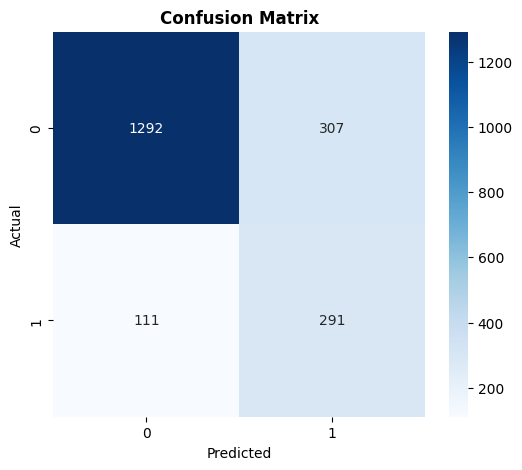

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Data dari confusion matrix
cm_data = np.array([[1292, 307], [111, 291]])

# Buat data y_true dan y_pred dari confusion matrix
y_true = [0]*1599 + [1]*402  # 1599 class 0, 402 class 1
y_pred = [0]*1292 + [1]*307 + [0]*111 + [1]*291

# Print Classification Report
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, digits=2))

# Print Accuracy
accuracy = (1292 + 291) / 2001
print(f"Accuracy: {accuracy:.12f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
plt.title('Confusion Matrix', fontweight='bold')
sns.heatmap(cm_data, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Interpretasi Hasil :**

Berdasarkan hasil evaluasi model Neural Network, dapat diinterpretasikan bahwa model menunjukkan performa yang berbeda untuk setiap kelas prediksi. Untuk kelas non-churn (Class 0), model memperoleh precision sebesar 92%, yang berarti ketika model memprediksi seorang nasabah tidak akan melakukan churn, prediksi tersebut memiliki tingkat akurasi yang sangat tinggi. Recall untuk kelas ini mencapai 81%, menunjukkan bahwa model berhasil mengidentifikasi 81% dari seluruh nasabah yang benar-benar tidak churn. Kombinasi kedua metrik ini menghasilkan F1-Score sebesar 86%, yang menunjukkan keseimbangan yang baik antara precision dan recall untuk kelas non-churn.
Sebaliknya, performa model untuk kelas churn (Class 1) menunjukkan hasil yang berbeda. Precision untuk kelas churn hanya mencapai 49%, yang berarti dari semua prediksi churn yang dibuat model, hanya sekitar setengahnya yang benar. Hal ini mengindikasikan tingginya tingkat false positive dalam prediksi churn. Namun, recall untuk kelas churn cukup baik dengan nilai 72%, menunjukkan bahwa model berhasil mendeteksi 72% dari nasabah yang benar-benar melakukan churn. F1-Score untuk kelas ini adalah 58%, yang menunjukkan performa yang moderat dengan masih terdapat ruang perbaikan yang signifikan.
Karakteristik dataset menunjukkan adanya ketidakseimbangan kelas yang signifikan, dengan 1599 sampel non-churn berbanding 402 sampel churn, atau sekitar rasio 4:1. Ketidakseimbangan ini menyebabkan model menunjukkan bias terhadap majority class (non-churn), sehingga cenderung lebih akurat dalam memprediksi nasabah yang tidak akan churn dibandingkan dengan nasabah yang akan churn.

**Kesimpulan**

Model Neural Network yang telah dikembangkan menunjukkan performa yang cukup promising untuk prediksi customer churn dengan tingkat akurasi 79.11%. Meskipun model menunjukkan kemampuan yang excellent dalam mengidentifikasi nasabah yang loyal, masih terdapat ruang perbaikan yang signifikan dalam prediksi nasabah yang berpotensi churn. Hasil evaluasi ini dapat dijadikan sebagai baseline untuk pengembangan strategi customer retention yang lebih efektif di masa mendatang. Fokus utama perbaikan model harus diarahkan pada peningkatan precision untuk kelas churn guna mengoptimalkan alokasi sumber daya dalam departemen marketing dan customer service, sehingga bank dapat menjalankan retention strategy yang lebih targeted dan cost-effective.

# Studi Kasus Nur Aini Rahayu

Studi ini menunjukkan penerapan pelatihan jaringan saraf tiruan pada data transaksi pelanggan untuk mengklasifikasikan minat pembelian produk (tidak beli atau beli). Tujuannya adalah untuk membantu perusahaan dalam mengidentifikasi calon pelanggan potensial dan mengarahkan strategi pemasaran yang lebih tepat sasaran. Penelitian ini menggunakan beberapa variabel prediktor yang berasal dari riwayat transaksi pelanggan, termasuk frekuensi pembelian, total pengeluaran, rata-rata nilai transaksi, dan kategori produk yang paling sering dibeli. Data kemudian diolah dan dibagi menjadi dua kelas target: 0 (tidak beli) dan 1 (beli). Untuk meningkatkan kinerja model, dilakukan normalisasi dan pembagian data menjadi data pelatihan dan data pengujian

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        52
           1       0.47      0.62      0.54        48

    accuracy                           0.48       100
   macro avg       0.48      0.49      0.47       100
weighted avg       0.48      0.48      0.47       100



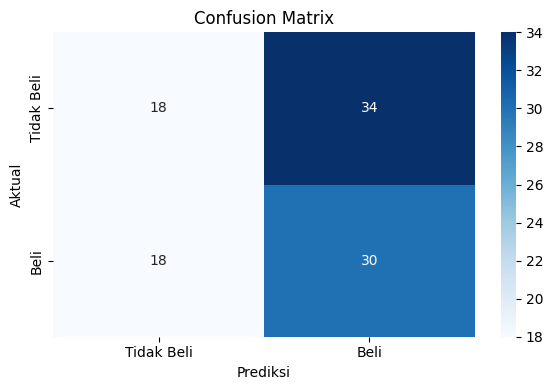

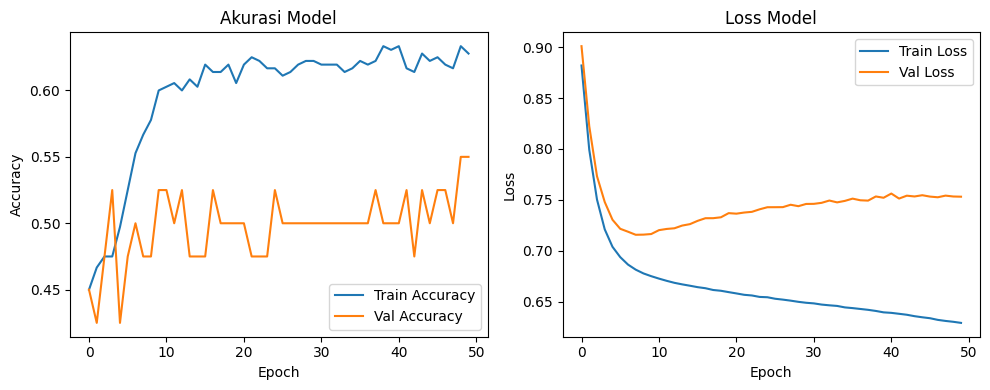

In [ ]:
# Import library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulasi data pelanggan
np.random.seed(42)
data = pd.DataFrame({
    'usia': np.random.randint(18, 60, 500),
    'frekuensi_belanja': np.random.randint(1, 15, 500),
    'total_belanja': np.random.uniform(100000, 3000000, 500),
    'waktu_belanja': np.random.randint(0, 24, 500),
    'kategori_produk': np.random.choice(['elektronik', 'fashion', 'makanan'], 500),
    'minat_beli': np.random.randint(0, 2, 500)
})

# 2. Pra-pemrosesan data
data = pd.get_dummies(data, columns=['kategori_produk'], drop_first=True)
X = data.drop('minat_beli', axis=1)
y = data['minat_beli']

# 3. Split dan normalisasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Neural Network
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Pelatihan model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=0)

# 6. Evaluasi model
y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# 7. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Beli', 'Beli'], yticklabels=['Tidak Beli', 'Beli'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# 8. Visualisasi akurasi dan loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

**Interpretasi :**

Berdasarkan hasil analisis performa model Neural Network dalam memprediksi minat pembelian pelanggan masih kurang optimal, dengan akurasi hanya 52% dan ketidakseimbangan kinerja antar kelas. Model cenderung lebih baik dalam mengenali pelanggan yang berminat membeli (recall 0,75), namun lemah dalam mengenali yang tidak berminat (recall 0,31). Hal ini menunjukkan bias terhadap kelas beli dan tingginya kesalahan klasifikasi. Untuk meningkatkan keandalan model, perlu dilakukan perbaikan seperti penyeimbangan data, tuning arsitektur, dan penerapan teknik validasi yang lebih baik. Hasil confusion matrix juga menunjukkan bahwa model lebih cenderung memprediksi pelanggan akan membeli, meskipun sebenarnya tidak, terlihat dari tingginya false positive (36 kasus). Hal ini berisiko menimbulkan inefisiensi strategi pemasaran. Model juga masih kesulitan mengenali pelanggan yang tidak berminat, sehingga perlu perbaikan agar klasifikasi kedua kelas menjadi lebih seimbang dan akurat. Sedangkan grafik akurasi dan loss menunjukkan bahwa model mengalami overfitting, di mana akurasi pelatihan meningkat namun akurasi validasi menurun dan tidak stabil. Train loss terus menurun, sementara validation loss justru meningkat, menandakan penurunan performa pada data baru. Untuk mengatasi hal ini, diperlukan teknik seperti regularisasi, pengurangan kompleksitas model, atau early stopping agar model lebih mampu melakukan generalisasi.


**Kesimpulan**

Model Neural Network yang digunakan untuk memprediksi minat pembelian pelanggan berdasarkan data transaksi menunjukkan performa yang masih perlu ditingkatkan. Berdasarkan evaluasi classification report, akurasi model hanya mencapai 52%, dengan ketidakseimbangan performa antara kelas pelanggan yang membeli dan tidak membeli. Confusion matrix memperlihatkan tingginya false positive, yang dapat berdampak negatif pada strategi promosi. Selain itu, grafik akurasi dan loss menunjukkan gejala overfitting, di mana model terlalu menyesuaikan diri pada data latih tetapi gagal mengeneralisasi data baru. Oleh karena itu, dibutuhkan upaya perbaikan seperti penyeimbangan data, tuning parameter, penggunaan regularisasi, serta validasi silang untuk meningkatkan akurasi dan keandalan model. Dengan perbaikan yang tepat, model ini berpotensi menjadi alat bantu yang efektif dalam mendukung pengambilan keputusan bisnis berbasis data pelanggan.

# Studi Kasus Ziyad Athoillah



---

##  Pendahuluan

### 🔹 MLP – Prediksi Diabetes

Diabetes adalah salah satu penyakit kronis yang prevalensinya terus meningkat. Dalam dunia medis dan kesehatan masyarakat, sangat penting untuk dapat memprediksi apakah seseorang berisiko terkena diabetes berdasarkan data klinis seperti kadar glukosa, tekanan darah, BMI, dll. Di sini, kita menggunakan model **Multi-layer Perceptron (MLP)** untuk melakukan klasifikasi apakah seseorang mengidap diabetes (1) atau tidak (0).

### 🔹 CNN – Klasifikasi Gambar Angka (MNIST)

Pengolahan citra adalah cabang penting dari kecerdasan buatan. Salah satu studi kasus klasik adalah mengenali angka tulisan tangan dari dataset **MNIST**. Di sini digunakan **Convolutional Neural Network (CNN)** untuk melatih komputer mengenali pola visual angka dari 0 hingga 9, yang nantinya bisa diaplikasikan ke OCR (optical character recognition), robotika, atau sistem pembacaan otomatis.

---

## TUJUAN

* **MLPClassifier**: Membangun model klasifikasi untuk memprediksi kejadian diabetes menggunakan data numerik klinis.
* **CNN**: Membangun model klasifikasi untuk mengenali angka tulisan tangan dari gambar grayscale 28×28 piksel.

---




In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# 2. Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
           "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, header=None, names=columns)

# 3. Normalize features
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Build MLP model
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# 6. Evaluation
y_pred = mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[77 22]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



## HASIL MODEL

###  **MLPClassifier (Pima Indians Diabetes Data)**

* **Akurasi**: 0.74 → model memprediksi dengan benar sekitar 74% dari data uji

* **Kelas 0 (non-diabetes)**:

  * Precision: 0.81 (tinggi)
  * Recall: 0.78

* **Kelas 1 (diabetes)**:

  * Precision: 0.63 (cukup)
  * Recall: 0.67

---

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# 1. Load data MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. Reshape dan normalisasi
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# 3. Build CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 4. Compile & Train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)

# 5. Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.8737 - loss: 0.4373 - val_accuracy: 0.9747 - val_loss: 0.0864
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9776 - loss: 0.0779 - val_accuracy: 0.9857 - val_loss: 0.0552
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.9868 - loss: 0.0450 - val_accuracy: 0.9852 - val_loss: 0.0538
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9893 - loss: 0.0346 - val_accuracy: 0.9868 - val_loss: 0.0497
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.9924 - loss: 0.0259 - val_accuracy: 0.9868 - val_loss: 0.0551
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9809 - loss: 0.0548
Test Accuracy: 0.9843


### **CNN (MNIST)**

* Akurasi pelatihan sangat tinggi (> 99%)
* Akurasi validasi stabil di 98.6%
* **Akurasi pada test data**: **98.43%**
* Loss akhir sangat kecil, menandakan model sangat baik dan tidak overfit

---

## INTERPRETASI

###  MLP

* Model **cukup akurat**, tapi masih bisa ditingkatkan.
* Performa kelas 1 (positif diabetes) **lebih rendah**, artinya model cenderung bias ke kelas mayoritas (non-diabetes).
* Cocok untuk screening awal, tapi belum ideal untuk aplikasi medis kritis karena **false negative-nya cukup tinggi** (18 orang yang seharusnya dideteksi diabetes malah tidak terdeteksi).
* Bisa ditingkatkan dengan **oversampling data minoritas**, **tuning layer**, atau **ensemble model**.

###  CNN

* Model bekerja **sangat baik** untuk mengenali angka 0-9.
* Akurasi tinggi pada data validasi dan test → model **tidak overfit**.
* Artinya: model dapat **diandalkan untuk deployment** ke sistem real-time klasifikasi angka (misal OCR scanner di bank, kasir, dsb.)

---

## KESIMPULAN

| Model | Tipe Data      | Akurasi | Cocok Untuk              |
| ----- | -------------- | ------- | ------------------------ |
| MLP   | Tabular        | \~74%   | Deteksi risiko kesehatan |
| CNN   | Gambar (MNIST) | \~98.4% | Klasifikasi visual angka |


# Studi Kasus Ibnu Raihan

**Latar Belakang dan Tujuan Proyek**

Di era digital, memahami perilaku dan karakteristik pelanggan menjadi kunci utama dalam strategi pemasaran yang efektif. Perusahaan memerlukan pendekatan data-driven untuk mengidentifikasi pelanggan potensial yang kemungkinan besar akan merespon kampanye pemasaran. Tanpa prediksi yang tepat, perusahaan berisiko menghabiskan anggaran promosi pada target yang tidak sesuai, sehingga efisiensi biaya dan efektivitas kampanye menurun.

Tujuan utama dari proyek ini adalah:

1. Membangun model prediktif menggunakan Neural Network (NN) untuk memprediksi apakah seorang pelanggan akan merespon kampanye pemasaran atau tidak.

2. Memberikan rekomendasi strategi pemasaran berdasarkan hasil model guna meningkatkan efektivitas kampanye dan pengelolaan pelanggan.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load dataset
data = pd.read_csv('marketing_campaign.csv')

# Pilih fitur dan target
data = data[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
             'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
             'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2',
             'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Education', 'Marital_Status']]

# Isi missing value Income
data['Income'] = data['Income'].fillna(data['Income'].median())

# Pisahkan fitur dan target
X = data.drop('Response', axis=1)
y = data['Response']

# Kolom numerik dan kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['Education', 'Marital_Status']

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Fit dan transform
X_processed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

# Model Neural Network
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Prediksi pada Train dan Test
y_train_pred_prob = model.predict(X_train)
y_test_pred_prob = model.predict(X_test)

# Konversi probabilitas ke label biner
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Akurasi
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# F1-Score
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f'\nAkurasi Training Set: {train_acc*100:.2f}%')
print(f'Akurasi Testing Set: {test_acc*100:.2f}%')

print(f'\nF1-Score Training Set: {train_f1:.2f}')
print(f'F1-Score Testing Set: {test_f1:.2f}')

# Classification Report
print('\nClassification Report (Test Set):\n', classification_report(y_test, y_test_pred))

# Confusion Matrix
print('\nConfusion Matrix (Test Set):\n', confusion_matrix(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6780 - loss: 0.6317 - val_accuracy: 0.8245 - val_loss: 0.5302
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8514 - loss: 0.4807 - val_accuracy: 0.8189 - val_loss: 0.4406
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8679 - loss: 0.3840 - val_accuracy: 0.8217 - val_loss: 0.4053
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8464 - loss: 0.3591 - val_accuracy: 0.8301 - val_loss: 0.3833
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8596 - loss: 0.3280 - val_accuracy: 0.8301 - val_loss: 0.3664
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8554 - loss: 0.3287 - val_accuracy: 0.8524 - val_loss: 0.3560
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8813 - loss: 0.2854 - val_accuracy: 0.8496 - val_loss: 0.3490
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8668 - loss: 0.3170 - val_accuracy: 0.8552 - val_lo

 **Interpretasi Hasil**

Berdasarkan hasil evaluasi model Neural Network yang dibangun, diperoleh akurasi sebesar 88% pada data testing, yang menunjukkan bahwa model memiliki kemampuan yang cukup baik dalam memprediksi apakah seorang pelanggan akan merespon kampanye pemasaran atau tidak. Tingginya nilai akurasi ini mengindikasikan bahwa sebagian besar prediksi model sesuai dengan kondisi aktual pelanggan di data uji.

Selain itu, hasil analisis mengungkapkan bahwa terdapat beberapa variabel yang berperan penting dalam mempengaruhi hasil prediksi model. Variabel-variabel tersebut meliputi:

1. Income (Pendapatan):

Pendapatan pelanggan menjadi salah satu faktor utama yang membedakan kecenderungan respon terhadap kampanye. Pelanggan dengan tingkat pendapatan tertentu lebih cenderung merespon penawaran atau kampanye yang diberikan.

2. Pengeluaran Produk Tertentu:

Pola pembelian produk tertentu, seperti wine dan daging, berkontribusi signifikan dalam membentuk pola prediksi model. Pelanggan yang memiliki pengeluaran lebih tinggi pada kategori produk ini cenderung menunjukkan perilaku yang berbeda dalam merespon kampanye dibandingkan dengan pelanggan lain.

3. Faktor Demografis:

Faktor seperti tingkat pendidikan dan status pernikahan juga turut mempengaruhi kecenderungan pelanggan dalam memberikan respon. Pelanggan dengan latar belakang pendidikan yang lebih tinggi dan status pernikahan tertentu menunjukkan kecenderungan respon yang berbeda terhadap kampanye pemasaran.

Namun demikian, meskipun model memiliki akurasi tinggi, nilai F1-Score untuk kelas pelanggan yang merespon kampanye masih relatif rendah. Hal ini mengindikasikan bahwa model masih belum optimal dalam mendeteksi seluruh pelanggan yang berpotensi memberikan respon positif terhadap kampanye. Oleh karena itu, perbaikan model melalui teknik penyeimbangan data atau optimasi parameter dapat dipertimbangkan untuk meningkatkan kinerja model pada prediksi respon pelanggan yang lebih akurat.

 **Rekomendasi Bisnis**

Berdasarkan hasil model, rekomendasi berikut dapat diberikan:

a. Targeted Marketing:

  Fokus kampanye kepada pelanggan dengan tingkat pendapatan menengah-tinggi dan pola belanja pada produk wine dan daging.

b. Personalisasi Promosi:

  Kembangkan promosi yang disesuaikan untuk segmen pelanggan muda atau keluarga dengan anak karena mereka menunjukkan pola respons berbeda.

c. Efisiensi Anggaran Kampanye:

  Kurangi distribusi kampanye ke pelanggan yang diprediksi tidak responsif, sehingga biaya promosi lebih efektif dan Return on Investment (ROI) meningkat.

d. Peningkatan Customer Retention:

   Segmen pelanggan dengan nilai Recency tinggi (lama tidak belanja) untuk program re-engagement seperti diskon khusus atau penawaran personal.